In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
input_file = ""
output_file = "/content/output.csv"

def txt_to_csv(input_file, output_file):
  with open(input_file, 'r') as txtfile:
    lines = txtfile.readlines()
  with open(output_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
  for line in lines:
    fields = line.strip().split()
    csv_writer.writerow(fields)

txt_to_csv(input_file, output_file)

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
data = pd.read_csv("/content/cleaned_data.csv")
data = data.drop(['Event'], axis=1)
data = data.reindex(np.random.permutation(data.index))
data.head()

,Week,Month,Day,Time,Year,EventTemplate
27185,Sat,Dec,3.0,05:01:49,2005,notice
35971,Sun,Jan,15.0,10:51:36,2006,error
29065,Sun,Dec,4.0,04:39:33,2005,notice
19865,Mon,Nov,21.0,15:36:55,2005,notice
34821,Sat,Jan,14.0,04:05:53,2006,error


In [ ]:
feature_name = ["Week", "Month", "Time", "EventTemplate"]
le = LabelEncoder()
for name in feature_name:
  data[name] = le.fit_transform(data[name])
for id in data.columns:
  data[id] = data[id].astype(np.int64)

X_train, X_test, y_train, y_test = train_test_split(data, data["EventTemplate"], test_size = 0.3, random_state=1, shuffle= True)
data.head()

,Week,Month,Day,Time,Year,EventTemplate
27185,2,1,3,3697,2005,1
35971,3,3,15,7180,2006,0
29065,3,1,4,3409,2005,1
19865,1,6,21,9841,2005,1
34821,2,3,14,2822,2006,0


In [ ]:
input = {
    "Week": layers.Input(shape=(1,), name= "Week"),
    "Month": layers.Input(shape=(1,), name= "Month"),
    "Day": layers.Input(shape=(1,), name= "Day"),
    "Time" : layers.Input(shape=(1,), name= "Time"),
    "Year": layers.Input(shape=(1,), name= "Year")
}

In [ ]:
def build_model(my_learning_rate, input):
  concatenated_inputs = tf.keras.layers.Concatenate()(input.values())
  dense_output = layers.Dense(units=1, name='dense_layer')(concatenated_inputs)
  my_outputs = {
    'dense': dense_output,
  }
  model = tf.keras.Model(inputs=input, outputs=my_outputs)
  model.compile(optimizer = keras.optimizers.experimental.RMSprop(learning_rate= my_learning_rate),
                loss = "mean_squared_error",
                metrics = [keras.metrics.RootMeanSquaredError()])
  return model

def train_model(model, data,label_name, batch_size, epochs):
  feature = {name:np.array(value) for name, value in data.items()}
  label = np.array(feature.pop(label_name))

  history = model.fit(x= feature,y= label, batch_size= batch_size, epochs=epochs)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return epochs, hist, rmse

In [ ]:
learning_rate = 0.01
epochs = 15
batch_size = 1000
validation_split = 0.2
label_name = "EventTemplate"

# feature = ["Week","Month","Day","Time","Year"]

model = build_model(input = input, my_learning_rate=learning_rate)
epochs, hist, rmse = train_model(model=model, data= X_train,label_name= label_name, batch_size=batch_size, epochs=epochs)
model.summary()

Epoch 1/15
37/37 [==============================] - 1s 7ms/step - loss: 19051120.0000 - root_mean_squared_error: 4364.7588
Epoch 2/15
37/37 [==============================] - 0s 4ms/step - loss: 2295030.0000 - root_mean_squared_error: 1514.9357
Epoch 3/15
37/37 [==============================] - 0s 5ms/step - loss: 176913.3750 - root_mean_squared_error: 420.6107
Epoch 4/15
37/37 [==============================] - 0s 4ms/step - loss: 26993.0488 - root_mean_squared_error: 164.2956
Epoch 5/15
37/37 [==============================] - 0s 3ms/step - loss: 2631.9307 - root_mean_squared_error: 51.3023
Epoch 6/15
37/37 [==============================] - 0s 3ms/step - loss: 2438.7046 - root_mean_squared_error: 49.3832
Epoch 7/15
37/37 [==============================] - 0s 3ms/step - loss: 2524.3511 - root_mean_squared_error: 50.2429
Epoch 8/15
37/37 [==============================] - 0s 3ms/step - loss: 2531.2649 - root_mean_squared_error: 50.3117
Epoch 9/15
37/37 [==============================

In [ ]:
print(X_train.shape)

(36402, 6)


In [ ]:
feature = {name:np.array(value) for name, value in X_test.items()}
label = np.array(feature.pop(label_name))
epochs_eva, rmse_eva = model.evaluate(x = feature, y=label, batch_size=batch_size)

16/16 [==============================] - 0s 3ms/step - loss: 2130.2048 - root_mean_squared_error: 46.1541


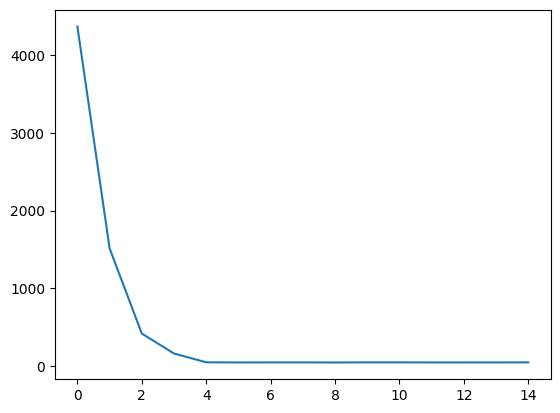

In [ ]:
plt.plot(epochs, rmse)

In [ ]:
print(epochs_eva, rmse_eva)

2130.204833984375 46.15414047241211
